<a href="https://colab.research.google.com/github/CristianS1988/GooSL/blob/main/Laboratorio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando paquetes

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

Importando datos

In [ ]:
df = pd.read_csv("databici.csv")
# un vistazo dentro del set de datos
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Exploración de datos
Tengamos primero una exploración descriptiva de nuestros datos.

In [ ]:
# Sumarizar los datos
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Seleccionemos algunas características para explorar más en detalle.

In [ ]:
cdf = df[['temp','season','hum','cnt']]
cdf.head(10)

,temp,season,hum,cnt
0,0.24,1,0.81,16
1,0.22,1,0.80,40
2,0.22,1,0.80,32
3,0.24,1,0.75,13
4,0.24,1,0.75,1
5,0.24,1,0.75,1
6,0.22,1,0.80,2
7,0.20,1,0.86,3
8,0.24,1,0.75,8
9,0.32,1,0.76,14


podemos dibujar cada una de estas características:

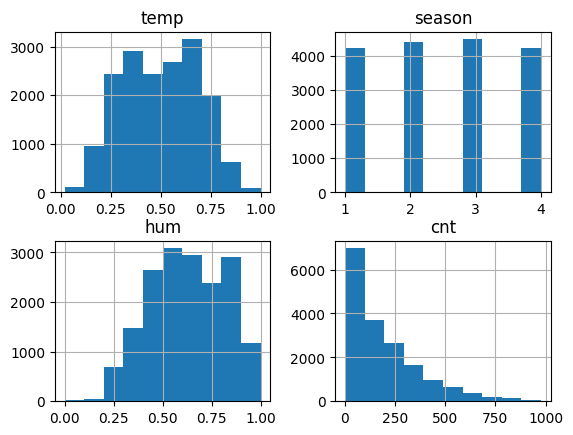

In [ ]:
viz = cdf[['temp','season','hum','cnt']]
viz.hist()
plt.show()

Ahora, comparemos estas características anteriores con la emisión de carbono, para ver cuán lineal es la regresión:

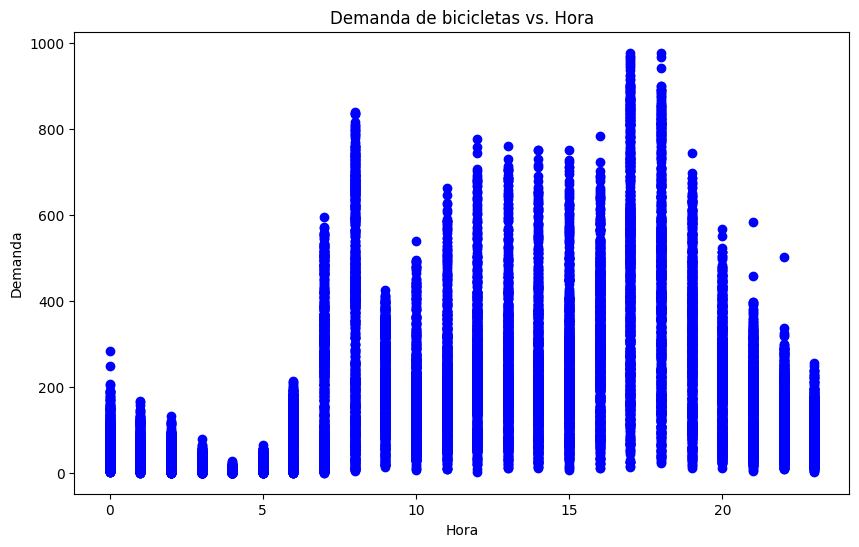

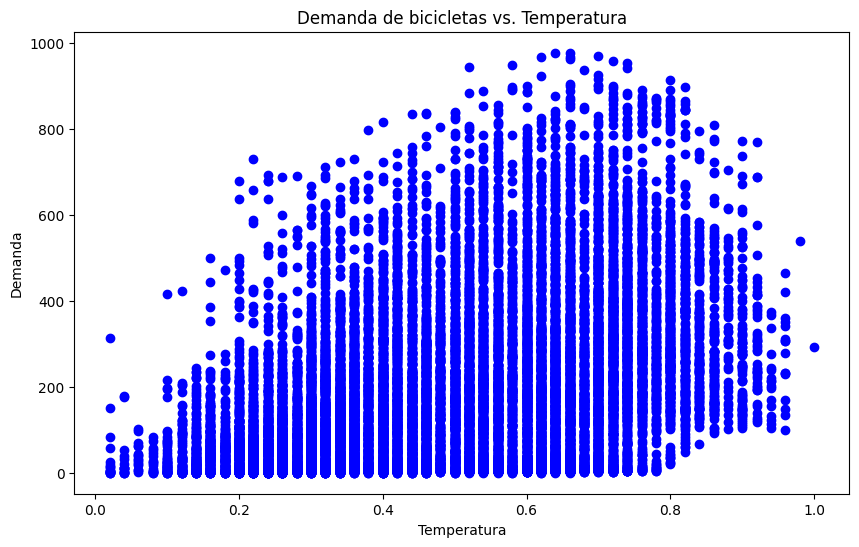

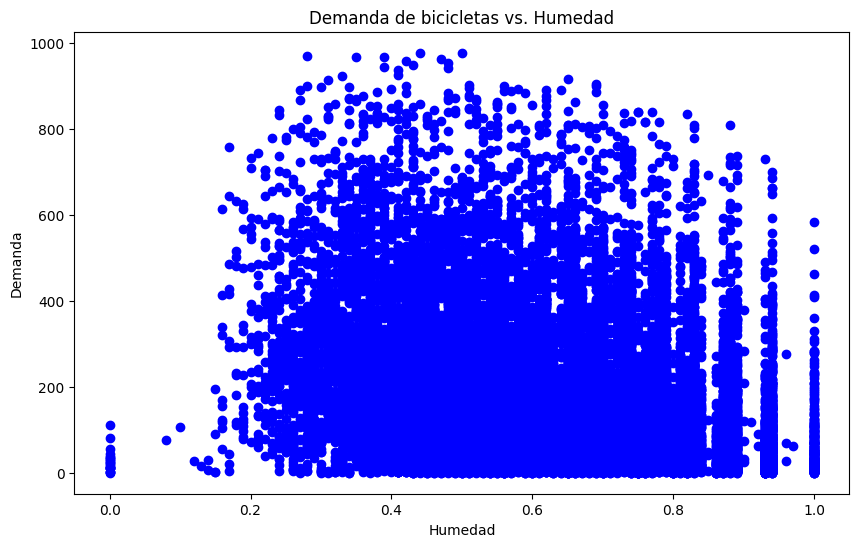

In [ ]:
# Demanda vs. Hora
plt.figure(figsize=(10, 6))
plt.scatter(df['hr'], df['cnt'], color='blue')
plt.xlabel("Hora")
plt.ylabel("Demanda")
plt.title("Demanda de bicicletas vs. Hora")
plt.show()

# Demanda vs. Temperatura
plt.figure(figsize=(10, 6))
plt.scatter(df['temp'], df['cnt'], color='blue')
plt.xlabel("Temperatura")
plt.ylabel("Demanda")
plt.title("Demanda de bicicletas vs. Temperatura")
plt.show()

# Demanda vs. Humedad
plt.figure(figsize=(10, 6))
plt.scatter(df['hum'], df['cnt'], color='blue')
plt.xlabel("Humedad")
plt.ylabel("Demanda")
plt.title("Demanda de bicicletas vs. Humedad")
plt.show()

# Sigue este patrón para cualquier otra característica que desees explorar


Creando el set de datos de entrenamiento y de prueba
Train/Test Split divide el dataseet en un set de training y otro de testing, siendo excluyentes. Después de ello, entrenamos con el set de training y pruebas con el de testing.

In [ ]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]


Modelo de Regresión Simple
La Regresión Lineal cuadra con un modelo lineal de coeficientes B = (B1, …, Bn) para minimizar la ‘suma residual de cuadrados’ entre la x independiente del dataset y la dependiente y por la aproximación lineal.

Entrenar distribución de los datos

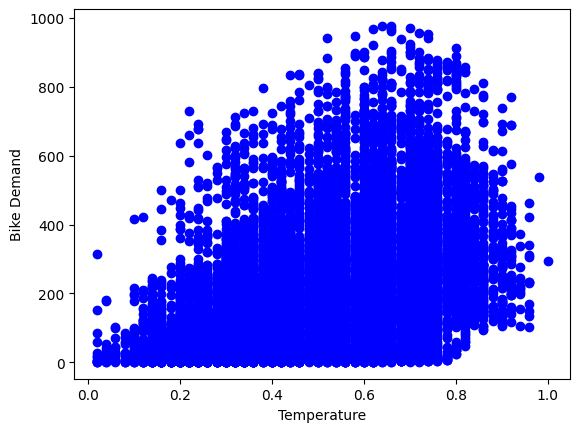

In [ ]:
plt.scatter(train['temp'], train['cnt'],  color='blue')
plt.xlabel("Temperature")
plt.ylabel("Bike Demand")
plt.show()


Entrenamiento

Modeling
Usando el paquete sklearn para modelar datos.

In [ ]:
from sklearn import linear_model

# Crear un objeto de regresión lineal
regr = linear_model.LinearRegression()

# Preparar los datos de entrenamiento
train_x = np.asanyarray(train[['temp']])
train_y = np.asanyarray(train[['cnt']])

# Entrenar el modelo
regr.fit (train_x, train_y)

# Imprimir los coeficientes e intercepto
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)


Coefficients:  [[385.89934875]]
Intercept:  [-1.33468423]


Trazar las salidas
podemos marcar la recta de ajuste sobre los datos:

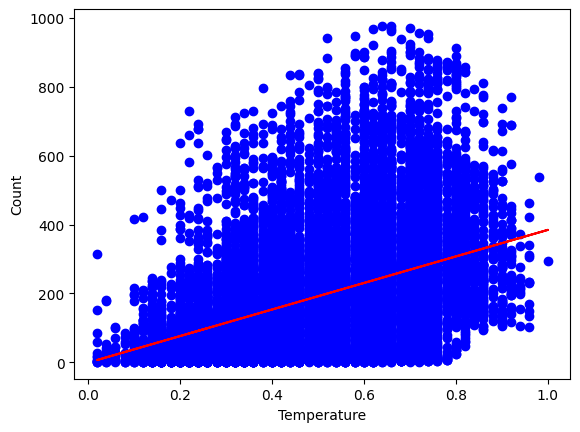

In [ ]:
# Graficar los puntos de datos
plt.scatter(train.temp, train.cnt,  color='blue')

# Graficar la línea de regresión
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')

# Etiquetas de los ejes
plt.xlabel("Temperature")
plt.ylabel("Count")

# Mostrar el gráfico
plt.show()

Evaluación
comparamos los valores actuales y predichos para calcular la exactitud del modelo de regresión. Las métricas de la evaluación proveen un role principal en el desarrollo de un modelo, ya que provee conocimiento profundo en áreas que necesitan mejoras.

Existen distintas métricas de evaluación de modelos, utilicemos MSE para calcular la exactitud de nuestro modelo basado en el set de prueba:
- Error absoluto de media: Es una media del valor absoluto de los errores. Es la métrica más fácil de comprender ya que simplemente es el promedio de los errores.
- Error Cuadrado Medio (MSE): El Error Cuadrado Medio (MSE) es la media del error cuadrático. Es más popular que el error de Media absoluto porque hace foco en grandes errores. Esto se debe a que el término cuadrático tiene errores más grandes que van creciendo en comparación con más pequeños.
- Error Cuadrático Medio (RMSE).
- R-cuadrática no es un error, sino que es una medida popular para darle precisión a nuestro modelo. Representa cuán cerca están los datos de la linea de regresión ajustada. Mientras más alto el R-cuadrático, mejor se encontrará ajustado el modelo respecto de los datos. El puntaje mejor posible es 1.0

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['temp']])
test_y = np.asanyarray(test[['cnt']])
test_y_ = regr.predict(test_x)

print("Error medio absoluto: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Suma residual de los cuadrados (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )


Error medio absoluto: 124.53
Suma residual de los cuadrados (MSE): 26345.46
R2-score: -3.76


1. ¿Qué rango de hora es la de mayor demanda?

In [ ]:
hour_demand = df.groupby('hr')['cnt'].sum().sort_values(ascending=False)
print(hour_demand)


hr
17    336860
18    309772
8     261001
16    227748
19    226789
13    184919
12    184414
15    183149
14    175652
20    164550
9     159438
7     154171
11    151320
10    126257
21    125445
22     95612
23     63941
6      55132
0      39130
1      24164
2      16352
5      14261
3       8174
4       4428
Name: cnt, dtype: int64


2. ¿Qué temporada es la mas alta?

In [ ]:
season_demand = df.groupby('season')['cnt'].sum().sort_values(ascending=False)
print(season_demand)


season
3    1061129
2     918589
4     841613
1     471348
Name: cnt, dtype: int64


3. ¿Es la temperatura relevante para el modelo?

In [ ]:
correlation_matrix = df.corr()
print(correlation_matrix['temp']['cnt'])


0.4047722757786578


<ipython-input-18-0f36463550b8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


4. ¿Es la humedad relevante para el modelo?

In [ ]:
print(correlation_matrix['hum']['cnt'])


-0.32291074082456017


5. ¿Qué condiciones serian ideales para nuestra demanda?

In [ ]:
ideal_conditions = df[df['cnt'] == df['cnt'].max()]
print(ideal_conditions)


       instant      dteday  season  yr  mnth  hr  holiday  weekday  \
14773    14774  2012-09-12       3   1     9  18        0        3   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
14773           1           1  0.66  0.6212  0.44     0.2537      91   

       registered  cnt  
14773         886  977  


Para finalizar, debe de utilizar los conocimientos adquiridos en clase para presentar un modelo que permita estimar la demanda de bicicletas para eventos futuros, recuerde no sobreajustar el modelo.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Definimos las variables independientes (X) y la dependiente (y)
X = df[['hr', 'season', 'temp', 'hum']]
y = df['cnt']

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos un objeto de regresión lineal
regr = LinearRegression()

# Entrenamos el modelo usando los conjuntos de entrenamiento
regr.fit(X_train, y_train)

# Hacemos predicciones usando el conjunto de prueba
y_pred = regr.predict(X_test)

# Mostramos los coeficientes
print('Coefficients: \n', regr.coef_)

# Mostramos el error cuadrático medio
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# Mostramos el coeficiente de determinación: 1 es la predicción perfecta
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))


Coefficients: 
 [   7.44363267   20.74348608  289.75590025 -227.74706132]
Mean squared error: 20822.64
Coefficient of determination: 0.34


Grafico

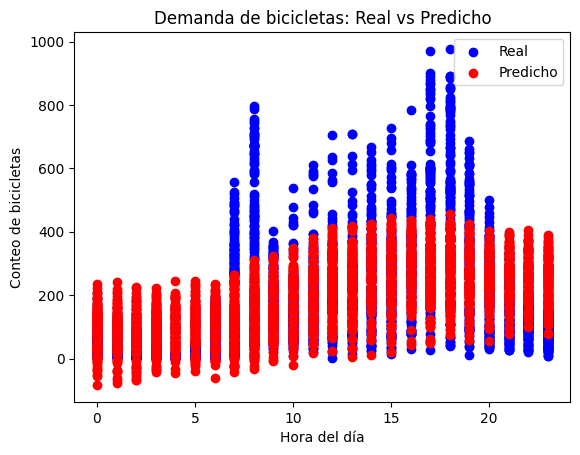

In [ ]:
import matplotlib.pyplot as plt

# Dibuja los valores reales
plt.scatter(X_test['hr'], y_test, color='blue', label='Real')

# Dibuja los valores predichos
plt.scatter(X_test['hr'], y_pred, color='red', label='Predicho')

# Añade una leyenda
plt.legend()

# Añade títulos y etiquetas
plt.title('Demanda de bicicletas: Real vs Predicho')
plt.xlabel('Hora del día')
plt.ylabel('Conteo de bicicletas')

# Muestra la gráfica
plt.show()
